In [2]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import warnings
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [3]:
XY = pd.read_csv('online_shoppers_intention.csv')

In [4]:
print(u'- El número de filas en el dataset es: {}'.format(XY.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(XY.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY.columns)))
XY[:5]

- El número de filas en el dataset es: 12330
- El número de columnas en el dataset es: 18
- Los nombres de las variables son: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
XY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
XY.describe(include = 'bool')

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


Podemos ver que necesitamos un modelo de cluster binario de Machine Learning para identificar qué tipo de usuario va a comprar en la tienda de la página web 

# Preprocesamiento de datos

Lo primero que se hará será eliminar los posibles nulos o missings del dataset

In [7]:
XY.isnull().sum()


Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [8]:
XY = XY.dropna()

In [9]:
XY.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
def describe_column(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:20].items() :
        print(i, '\t', v)
#Función para describir cada columna

In [11]:
describe_column(XY, 'Administrative')

Columna: Administrative  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 27
Valores más frecuentes:
0.0 	 5754
1.0 	 1354
2.0 	 1114
3.0 	 915
4.0 	 765
5.0 	 575
6.0 	 432
7.0 	 338
8.0 	 287
9.0 	 225
10.0 	 153
11.0 	 105
12.0 	 86
13.0 	 56
14.0 	 44
15.0 	 38
16.0 	 24
17.0 	 16
18.0 	 12
19.0 	 6


In [12]:
describe_column(XY, 'Administrative_Duration')

Columna: Administrative_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 3336
Valores más frecuentes:
0.0 	 5857
4.0 	 56
5.0 	 53
7.0 	 45
11.0 	 42
6.0 	 41
14.0 	 37
9.0 	 35
-1.0 	 33
15.0 	 33
10.0 	 32
19.0 	 29
13.0 	 29
21.0 	 28
12.0 	 28
18.0 	 26
8.0 	 26
3.0 	 26
20.0 	 25
17.0 	 25


Existen valores erróneos de -1 sobre la duración que pasa el cliente en la página. Lo que haremos será borrar todos esos valores ya que los considero como nulos.

In [13]:
menos_1 = XY['Administrative_Duration'] == -1
menos_uno = XY[menos_1]

In [14]:
menos_uno.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
16,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,1,1,4,3,Returning_Visitor,False,False
21,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.2,0.2,0.0,0.0,Feb,3,3,1,3,Returning_Visitor,False,False


In [15]:
XY = XY.drop(XY[XY['Administrative_Duration']==-1].index)

In [16]:
describe_column(XY, 'Administrative_Duration')

Columna: Administrative_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 3335
Valores más frecuentes:
0.0 	 5857
4.0 	 56
5.0 	 53
7.0 	 45
11.0 	 42
6.0 	 41
14.0 	 37
9.0 	 35
15.0 	 33
10.0 	 32
19.0 	 29
13.0 	 29
12.0 	 28
21.0 	 28
8.0 	 26
3.0 	 26
18.0 	 26
20.0 	 25
17.0 	 25
37.0 	 24


In [17]:
describe_column(XY, 'Informational')

Columna: Informational  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 17
Valores más frecuentes:
0.0 	 9653
1.0 	 1041
2.0 	 727
3.0 	 380
4.0 	 222
5.0 	 99
6.0 	 78
7.0 	 36
9.0 	 15
8.0 	 14
10.0 	 7
12.0 	 5
14.0 	 2
11.0 	 1
16.0 	 1
24.0 	 1
13.0 	 1


In [18]:
describe_column(XY, 'Informational_Duration')

Columna: Informational_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 1258
Valores más frecuentes:
0.0 	 9879
9.0 	 33
7.0 	 26
6.0 	 26
10.0 	 26
13.0 	 23
12.0 	 23
8.0 	 22
16.0 	 22
11.0 	 21
17.0 	 18
15.0 	 18
5.0 	 18
23.0 	 17
4.0 	 17
14.0 	 17
18.0 	 17
3.0 	 16
20.0 	 14
21.0 	 14


In [19]:
describe_column(XY, 'ProductRelated')

Columna: ProductRelated  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 311
Valores más frecuentes:
1.0 	 592
2.0 	 460
3.0 	 456
4.0 	 400
6.0 	 395
7.0 	 391
5.0 	 380
8.0 	 370
10.0 	 330
9.0 	 317
12.0 	 313
11.0 	 308
13.0 	 289
15.0 	 270
16.0 	 260
14.0 	 251
17.0 	 226
20.0 	 225
19.0 	 218
22.0 	 213


In [20]:
describe_column(XY, 'ProductRelated_Duration')

Columna: ProductRelated_Duration  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 9551
Valores más frecuentes:
0.0 	 719
17.0 	 21
8.0 	 17
11.0 	 17
15.0 	 16
22.0 	 15
12.0 	 15
19.0 	 15
13.0 	 14
7.0 	 14
24.0 	 13
14.0 	 13
5.0 	 13
59.0 	 12
25.0 	 12
34.0 	 12
50.0 	 11
36.0 	 11
26.0 	 10
64.0 	 10


In [21]:
describe_column(XY, 'BounceRates')

Columna: BounceRates  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 1872
Valores más frecuentes:
0.0 	 5507
0.2 	 667
0.066666667 	 134
0.028571429 	 115
0.05 	 112
0.033333333 	 101
0.025 	 100
0.016666667 	 99
0.1 	 97
0.04 	 95
0.02 	 91
0.022222222000000003 	 88
0.0125 	 85
0.018181818 	 81
0.015384615 	 76
0.014285714 	 73
0.008333333 	 72
0.011111111000000002 	 62
0.01 	 61
0.013333333000000001 	 54


In [22]:
describe_column(XY, 'ExitRates')

Columna: ExitRates  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 4777
Valores más frecuentes:
0.2 	 676
0.1 	 336
0.05 	 326
0.033333333 	 290
0.066666667 	 265
0.025 	 224
0.04 	 212
0.016666667 	 181
0.02 	 167
0.022222222000000003 	 152
0.028571429 	 150
0.014285714 	 118
0.0125 	 112
0.011111111000000002 	 103
0.013333333000000001 	 87
0.018181818 	 87
0.015384615 	 83
0.008333333 	 78
0.0 	 76
0.01 	 70


In [23]:
describe_column(XY, 'PageValues')

Columna: PageValues  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 2704
Valores más frecuentes:
0.0 	 9553
53.988 	 6
42.29306752 	 3
40.27815244 	 2
12.55885714 	 2
44.89345937 	 2
58.9241766 	 2
16.158558199999998 	 2
10.99901844 	 2
21.2112655 	 2
26.5455 	 2
59.988 	 2
9.084767800000002 	 2
87.90296059999999 	 2
22.738000000000003 	 2
34.03997536 	 2
40.4014481 	 2
54.98 	 2
14.1273698 	 2
78.56959864 	 2


In [24]:
describe_column(XY, 'SpecialDay')

Columna: SpecialDay  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 6
Valores más frecuentes:
0.0 	 11035
0.6 	 349
0.8 	 325
0.4 	 242
0.2 	 178
1.0 	 154


In [25]:
describe_column(XY, 'Month')

Columna: Month  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 10
Valores más frecuentes:
May 	 3357
Nov 	 2995
Mar 	 1884
Dec 	 1727
Oct 	 549
Sep 	 448
Aug 	 433
Jul 	 431
June 	 288
Feb 	 171


In [26]:
describe_column(XY, 'OperatingSystems')

Columna: OperatingSystems  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 8
Valores más frecuentes:
2 	 6578
1 	 2573
3 	 2545
4 	 476
8 	 79
6 	 19
7 	 7
5 	 6


In [27]:
describe_column(XY, 'Browser')

Columna: Browser  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 13
Valores más frecuentes:
2 	 7934
1 	 2451
4 	 732
5 	 465
6 	 174
10 	 162
8 	 134
3 	 104
13 	 61
7 	 49
12 	 10
11 	 6
9 	 1


In [28]:
describe_column(XY, 'Region')

Columna: Region  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 9
Valores más frecuentes:
1 	 4765
3 	 2394
4 	 1175
2 	 1130
6 	 804
7 	 758
9 	 508
8 	 434
5 	 315


In [29]:
describe_column(XY, 'TrafficType')

Columna: TrafficType  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 20
Valores más frecuentes:
2 	 3907
1 	 2435
3 	 2036
4 	 1067
13 	 736
10 	 450
6 	 442
8 	 343
5 	 259
11 	 247
20 	 197
9 	 42
7 	 40
15 	 37
19 	 17
14 	 13
18 	 10
16 	 3
12 	 1
17 	 1


In [30]:
describe_column(XY, 'VisitorType')

Columna: VisitorType  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 3
Valores más frecuentes:
Returning_Visitor 	 10504
New_Visitor 	 1694
Other 	 85


In [31]:
describe_column(XY, 'Weekend')

Columna: Weekend  -  Tipo de datos: bool
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
False 	 9421
True 	 2862


In [32]:
describe_column(XY, 'Revenue')

Columna: Revenue  -  Tipo de datos: bool
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
False 	 10375
True 	 1908


Para graficar nuestras variables, lo primero es transformar las variables categóricas a numéricas.

Transformación de los booleanos a numéricos

In [33]:
XY['Weekend'] = XY['Weekend'].map({False:0, True:1})
XY['Revenue'] = XY['Revenue'].map({False:0, True:1})

Para tomar una decisión sobre qué modelo emplear, primero necesitamos saber cuántas variables tiene 'Month' y 'VisitorType'

In [34]:
XY.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [35]:
XY.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Como tenemos solo 13 categorias, emplear la función dummies es una buena opción

In [36]:
X_D = pd.get_dummies(XY,columns=['Month','VisitorType'],drop_first=True)
X_D[:5]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1


Creamos un dataframe sin columnas categóricas para graficar

In [37]:
X_numeric = XY.drop(columns=['Month', 'VisitorType', 'Revenue'])

Separamos nuestra target Y de las features X

In [38]:
X = X_D.drop('Revenue', axis=1)
y = X_D['Revenue']

Gráficos

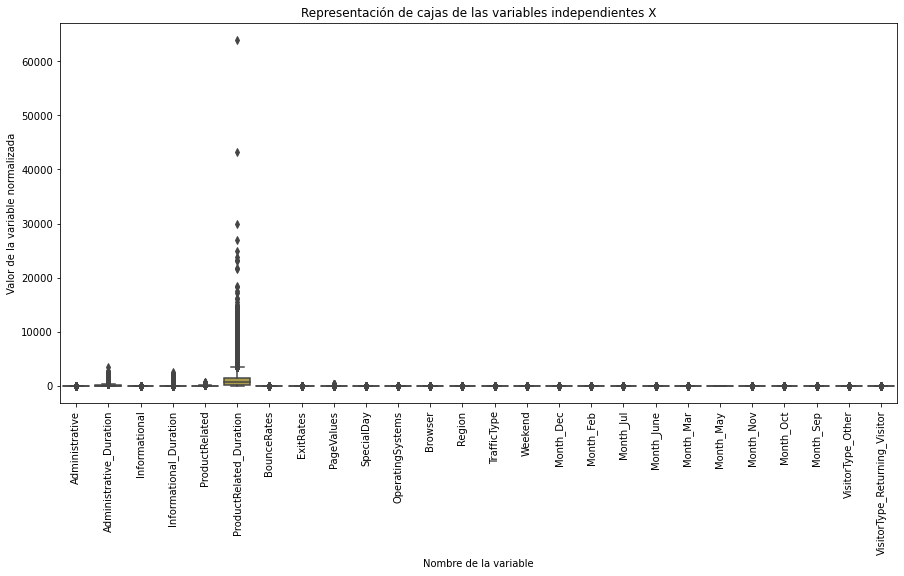

In [39]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

Todas las variables están concentradas en la parte baja del gráfico a excepción de 'ProductRelated_Duration'. Esta es una buena razón para estandarizar nuestros datos antes de entrenar nuestro modelo.

Detectación de Outlier en la variable 'ProductRelated_Duration', era la única columna con posibles outliers de acuerdo al gráfico

In [40]:
q = X["ProductRelated_Duration"].quantile(0.99)

In [41]:
time_spent=X[X["ProductRelated_Duration"] > q]

In [42]:
time_spent_in_seconds = time_spent['ProductRelated_Duration'].mean()

In [43]:
time_spent_in_hours = time_spent_in_seconds/3600 # Estas columnas están en segundos

In [44]:
round(time_spent_in_hours, 2)

3.59

Podemos ver que la media del tiempo pasado en la página web de la tienda para el cuantil 0,01 mayor de 'ProductRelated_Duration' es 3,59 horas.
Los outliers permanecerán en nuestro marco de datos.

Gráficos

In [45]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X_numeric.columns))
    fig_por_fila = 4.
    tamanio_fig = 4.
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X_numeric[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor de y sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 3.; fig_tamanio = 5.
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

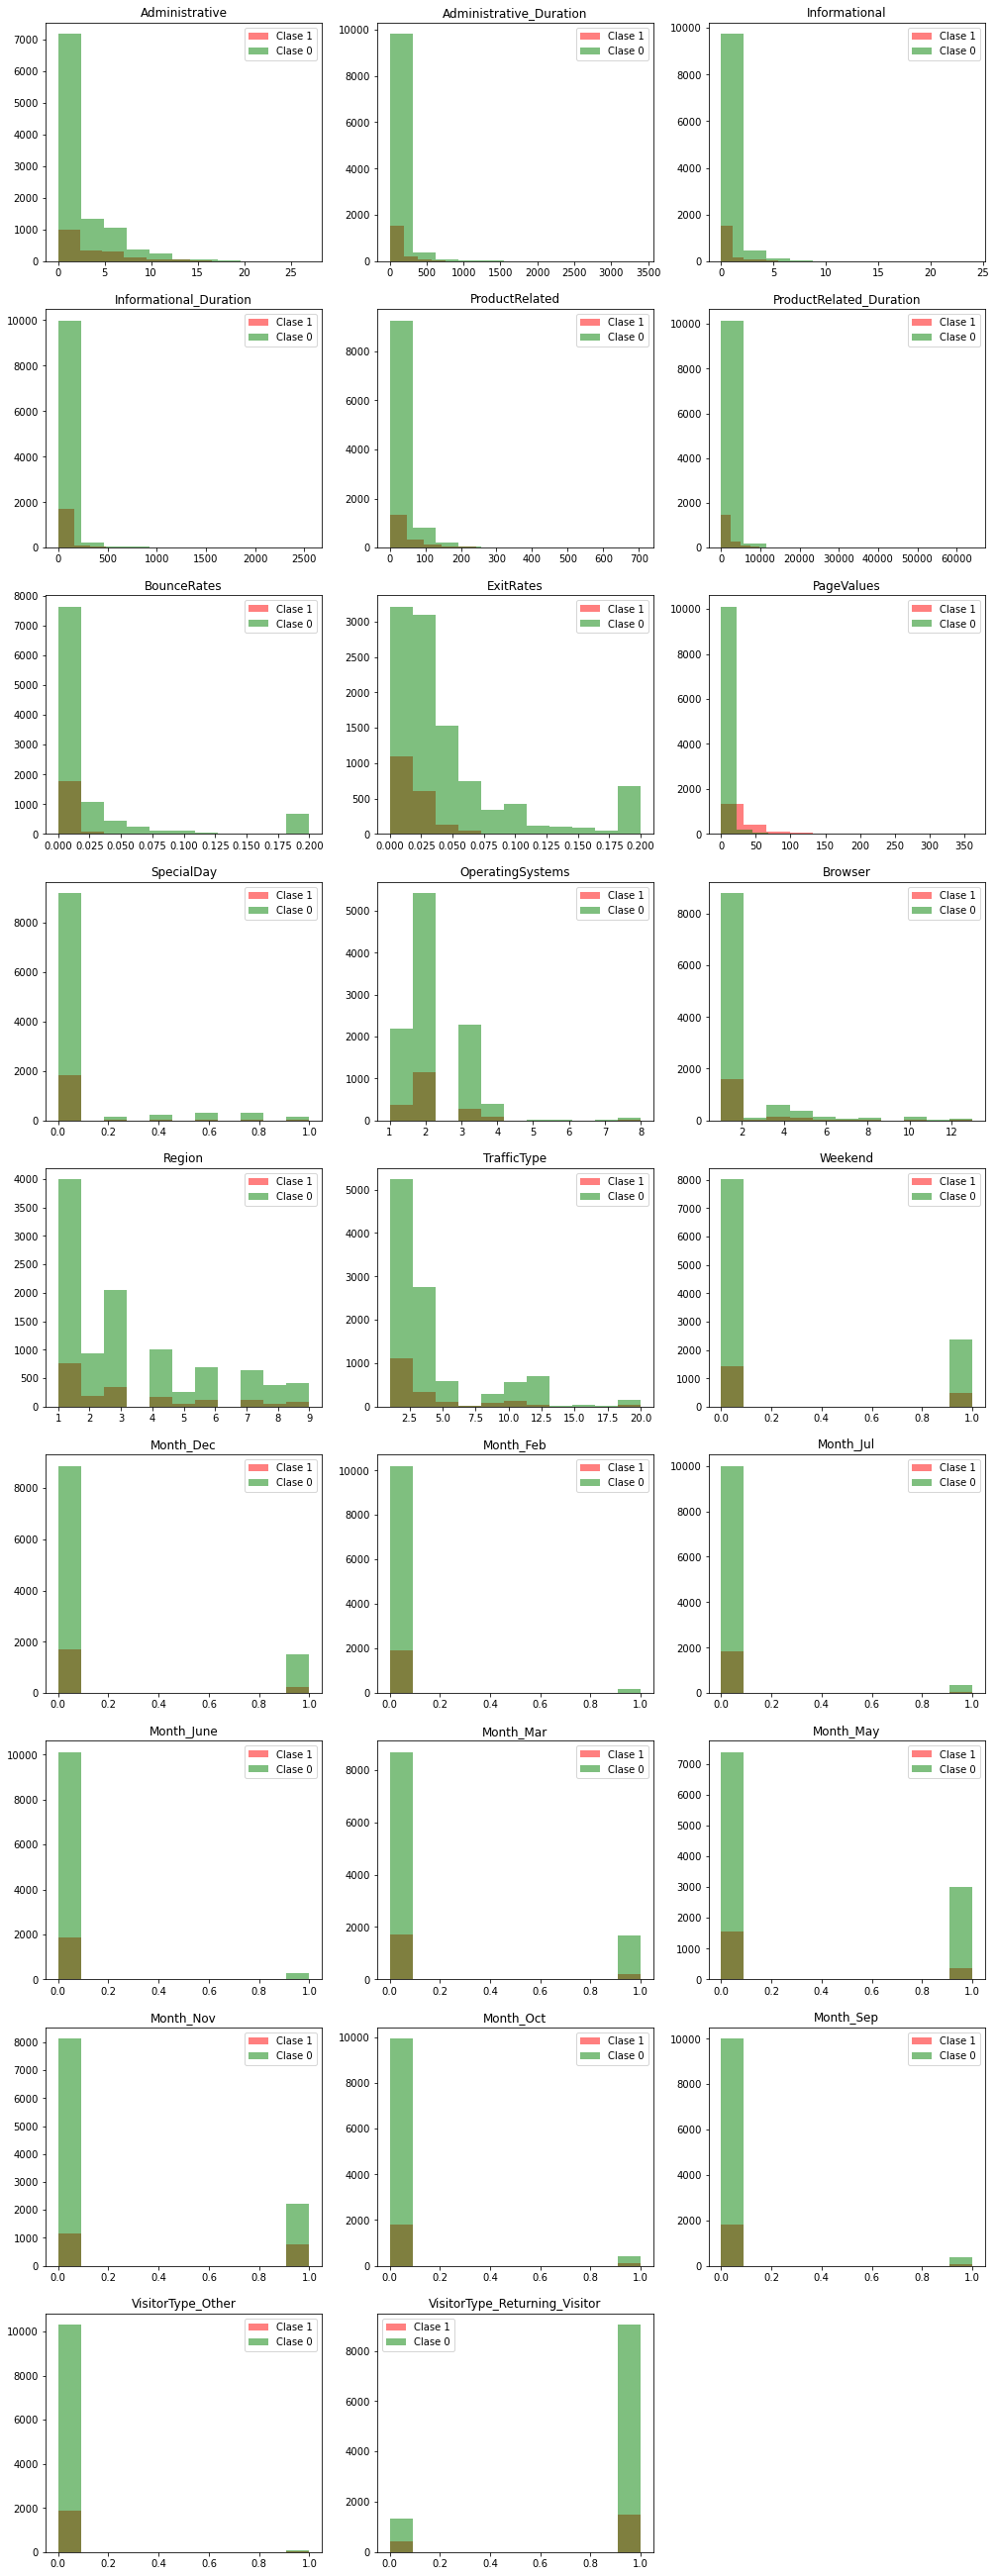

In [46]:
hist_pos_neg_feat(X,y)

En relación a estos gráficos, podemos ver que los clientes que realizan una compra a través de la página web, están distribuidos uniformemente dentro de nuestros datos. 

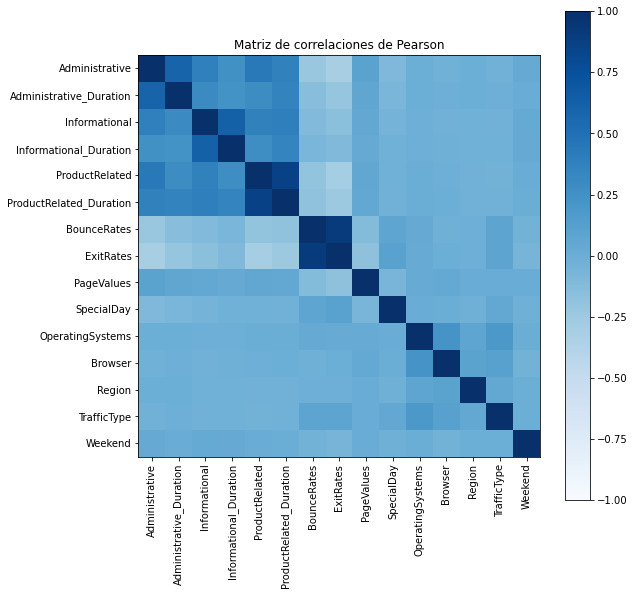

In [47]:
matriz_correlaciones = X_numeric.corr(method='pearson')
n_ticks = len(X_numeric.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), X_numeric.columns, rotation='vertical')
plt.yticks(range(n_ticks), X_numeric.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

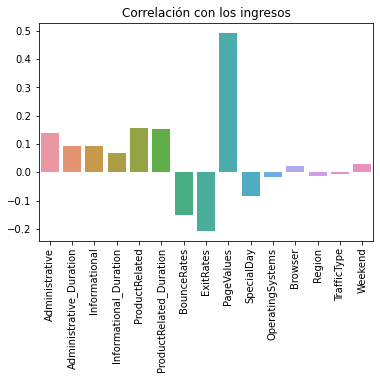

In [48]:
# Correlation con los ingresos 'Revenue'
data_corr = XY.corr()['Revenue'] 
sns.barplot(data_corr[0:-1].index,data_corr[0:-1].values).set_title('Correlación con los ingresos')
plt.xticks(rotation = 90)
plt.show()

Como resultado, los valores de página tienen la correlación más alta (alrededor de 0,5) con los ingresos en comparación con todas las demás características.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


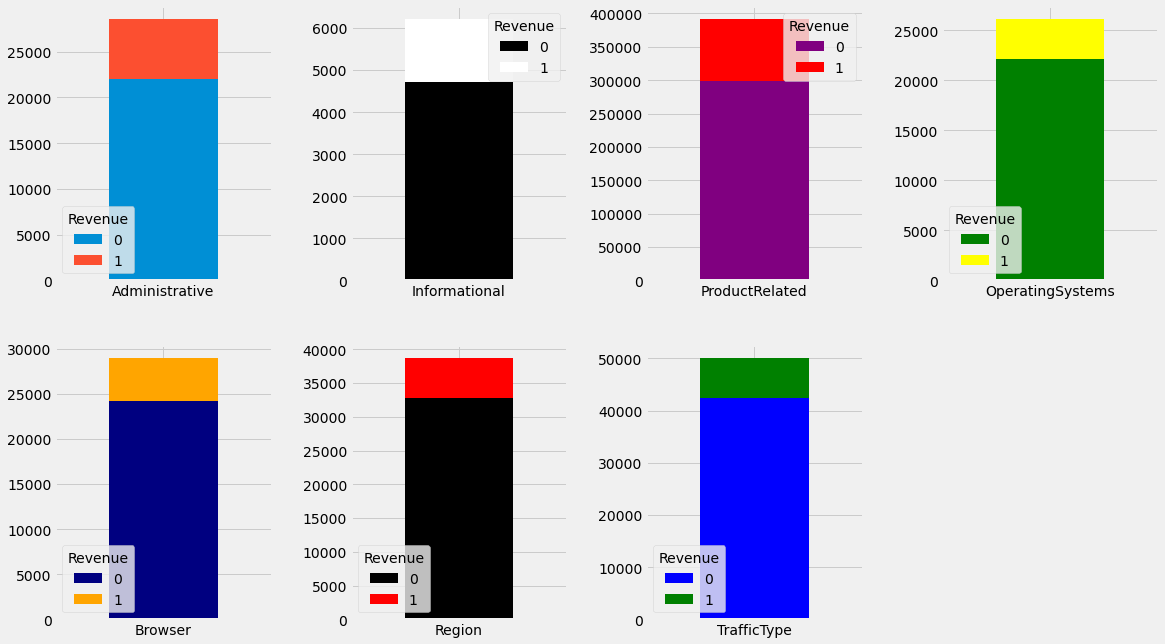

In [49]:
# Vamos a ver el ratio de Revenue con cada tipo
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,10))
fig.tight_layout(pad = 3)


adm_rev = XY[['Administrative','Revenue']]
rev_p1 = pd.DataFrame(XY.groupby('Revenue')['Administrative'].sum()).T
rev_p1.plot.bar(stacked=True,ax=ax[0,0])
ax[0,0].set_xticklabels(['Administrative'], rotation=360)
plt.legend(loc='best')


info_rev = XY[['Informational','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['Informational'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,1],color = ['black','white'])
ax[0,1].set_xticklabels(['Informational'], rotation=360)
plt.legend(loc='best')

info_rev = XY[['ProductRelated','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['ProductRelated'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,2],color = ['purple','red'])
ax[0,2].set_xticklabels(['ProductRelated'], rotation=360)
plt.legend(loc='best')



info_rev = XY[['OperatingSystems','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['OperatingSystems'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[0,3],color = ['green','yellow'])
ax[0,3].set_xticklabels(['OperatingSystems'], rotation=360)


info_rev = XY[['Browser','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['Browser'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,0],color = ['navy','orange'])
ax[1,0].set_xticklabels(['Browser'], rotation=360)


info_rev = XY[['Region','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['Region'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,1],color = ['black','red'])
ax[1,1].set_xticklabels(['Region'], rotation=360)


info_rev = XY[['TrafficType','Revenue']]
rev_p2 = pd.DataFrame(XY.groupby('Revenue')['TrafficType'].sum()).T
rev_p2.plot.bar(stacked=True,ax = ax[1,2],color = ['blue','green'])
ax[1,2].set_xticklabels(['TrafficType'], rotation=360)

fig.delaxes(ax[1,3])

'Administrative', 'Informational' y 'ProductRelated' son las variables que más relación presentan con 'Revenue'

Estandarización de los datos

In [50]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X_D)

In [51]:
X_estandarizado

array([[-0.6989074 , -0.45823768, -0.39724702, ..., -0.19456059,
        -0.08347668,  0.41153864],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.19456059,
        -0.08347668,  0.41153864],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.19456059,
        -0.08347668,  0.41153864],
       ...,
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.19456059,
        -0.08347668,  0.41153864],
       [ 0.50410263, -0.03460371, -0.39724702, ..., -0.19456059,
        -0.08347668,  0.41153864],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.19456059,
        -0.08347668, -2.42990549]])

Ahora dividimos nuestro dataframe en entrenar y testear para empezar a aplicar modelos

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Ahora comenzaremos a entrenar tres modelos de ML con el objetivo de encontrar el que mejor se nos ajuste

- Regresión Lógica

GridSearchCV es un código muy útil para nuestro modelo de ML ya que nos permite encontrar la mejor combinación de parámetros

In [53]:
modelo1 = LogisticRegression()
parametros = {"C": [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], 
              "class_weight":['balanced', None]}

In [54]:
modelo_gs = GridSearchCV(modelo1, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05,
                               0.06],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [55]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.02, 'class_weight': 'balanced'} 
ROC AUC: 0.88


0,88 ROC AUC es un muy buen resultado

In [56]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

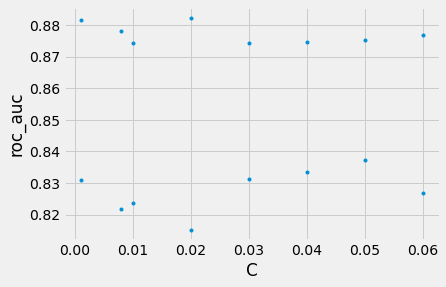

In [57]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

Analizando el modelo con el mejor alpha. En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior

In [58]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

Finalmente entrenamos nuestro modelo con los mejores parámetros que GridSearch nos ha dado

In [59]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.02, class_weight='balanced')

Aquí es cuando el test comienza. Con este modelo optimizado, predecimos los test para ver cómo se comporta con datos que no ha visto antes

In [60]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

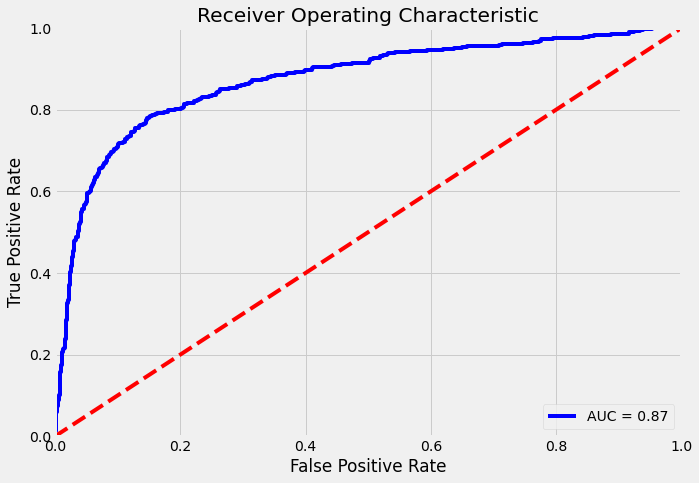

In [61]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

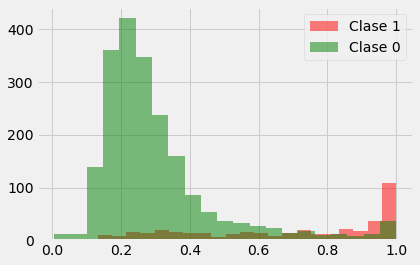

In [62]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

Esta figura representa en verde las probabilidades que asigna el modelo a los datos que son 0 (cuanto más cerca de 0 la distribución verde mejor) y en rojo las probabilidades asignadas a los datos que son 1 (cuanto más cerca esté de 1 la distribución roja mejor).

Tenemos que elegir el umbral para separar nuestros resultados, que son valores continuos, en una opción binaria de Sí o No (1 o 0) sobre la probabilidad de ingresos.

In [63]:
umbral = 0.6
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [64]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))    

Matriz de confusión
 [[1913  142]
 [ 143  259]]

Accuracy	0.88
Sensitividad	0.64
Precisión	0.65


In [65]:
umbral = 0.7
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [66]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2))) 

Matriz de confusión
 [[1955  100]
 [ 173  229]]

Accuracy	0.89
Sensitividad	0.57
Precisión	0.7


Finalmente mantenemos en 0,7 el umbral porque nos da el mejor rendimiento

- Redes Neurológicas

In [67]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [300,500, 800, 1000], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(0.5, 2), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(10, 35), # Número de neuronas en cada capa
              'random_state':[0]}

In [68]:
modelo_gs2 = GridSearchCV(modelo, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs2.fit(X_train, Y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  4

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.31622777, 0.03162278]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34]),
                         'max_iter': [300, 500, 800, 1000], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

En este caso para GridSearch el max_iter fue 500, y obtenemos que este parámetro fue el mejor. Ajustamos GridSearch para probar con el más alto max_iter y mirar si nuestro modelo mejora

In [69]:
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs2.best_score_,2)))

{'alpha': 0.31622776601683794, 'hidden_layer_sizes': 24, 'max_iter': 800, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


Como podemos ver, el ROC AUC mejora con el max_iter que dimos de nuevo. Primero lo chequeo con el test df para ver si también obtenemos la misma mejora o en el peor de los casos obtenemos un sobreajuste

In [70]:
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs2.best_score_,2)))

{'alpha': 0.31622776601683794, 'hidden_layer_sizes': 24, 'max_iter': 800, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


- Mejores parámetros

Como en los otros modelos, obtenemos los mejores parámetros encontrados y ajustamos un modelo con esos parámetros:

In [71]:
mejor_modelo = MLPClassifier(**modelo_gs2.best_params_, verbose=10)

In [72]:
mejor_modelo.fit(X_train, Y_train)

MLPClassifier(alpha=0.31622776601683794, hidden_layer_sizes=24, max_iter=800,
              random_state=0, solver='lbfgs', verbose=10)

In [73]:
y_test_pred_prob = mejor_modelo.predict_proba(X_test) 
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

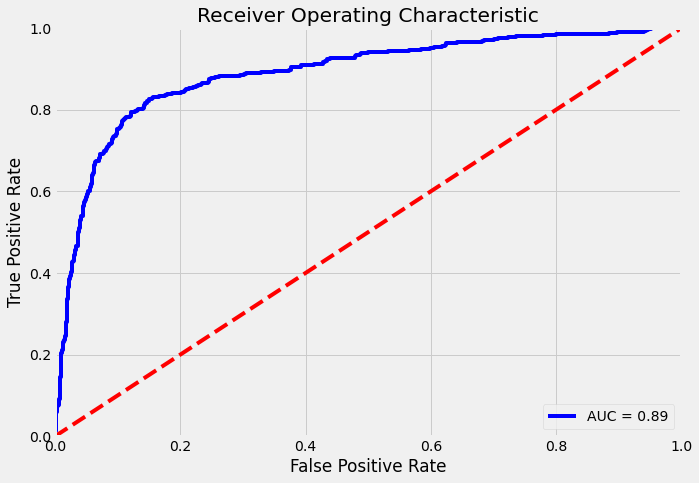

In [74]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

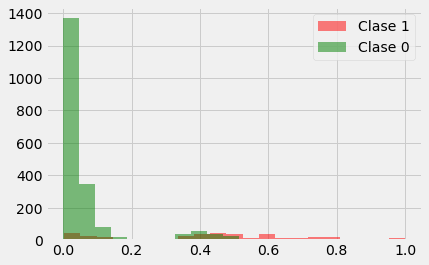

In [75]:
represento_doble_hist(y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, density=0)

In [76]:
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:, 1] > umbral)

In [77]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas),2)))  
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas),2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas),2)))  

Matriz de confusión
 [[1994   61]
 [ 229  173]]

Accuracy	0.88
Sensitividad	0.43
Precisión	0.74


Modificando el max_iter de 500 a 1000, mejora el modelo pero solo en el train df. Se ha mantenido el 0,88 de precisión

- Random Forest Classifier

In [78]:
rfclf = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)

In [79]:
rfclf.fit(X_train,Y_train)
pred = rfclf.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.80      0.53      0.64       402

    accuracy                           0.90      2457
   macro avg       0.86      0.75      0.79      2457
weighted avg       0.90      0.90      0.89      2457



Optimizamos Random Forest Classifier utilizando Gridsearch

In [80]:
param_grid = {
    'n_estimators' : [80,100],
    'max_depth' : [10,15],
    'min_samples_leaf' : [2,3],
    'min_samples_split': [2,4]
}

gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.7min finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=10, n_estimators=30,
                                              random_state=101),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [80, 100]},
             verbose=1)

In [81]:
gridsearch.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [82]:
rfclf = RandomForestClassifier(n_estimators = 100,max_depth = 10,min_samples_leaf = 3, min_samples_split = 2,random_state = 101)
rfclf.fit(X_train,Y_train)
pred = rfclf.predict(X_test)
print(classification_report(Y_test,pred))


# 0 es False y 1 es True, la precisión de detectar True ha aumentado
from sklearn.metrics import accuracy_score
rfacc = accuracy_score(Y_test,pred)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2055
           1       0.81      0.55      0.65       402

    accuracy                           0.90      2457
   macro avg       0.86      0.76      0.80      2457
weighted avg       0.90      0.90      0.90      2457



Finalmente hemos desarrollado los 3 modelos de ML para predecir si un visitante a la pagina web de una tienda realizará una compra o no, pero hasta donde hemos visto hasta ahora, nos surge el gran problema de que estos resultados no son fácilmente transformables en valor para el departamento de marketing o algún otro dentro de la compañia.

Esto es debido a la característica de Black Box de la gran mayoría de los modelos utilizados, lo que se traduce en no poder extraer importantes insigths desde la aplicación de modelos de ML.

Es en razón a lo anterior que se utilizaría finalmente la técnica de "Permutation Importance" para determinar cuál de todas nuestras features son las que entregan mayor aproximación a determinar si se realizará o no la compra.

En busca de la explicación de nuestro modelos:

In [85]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [86]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfclf, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1351 ± 0.0076,PageValues
0.0113 ± 0.0063,ExitRates
0.0108 ± 0.0042,Month_Nov
0.0085 ± 0.0038,BounceRates
0.0039 ± 0.0022,ProductRelated_Duration
0.0038 ± 0.0034,ProductRelated
0.0024 ± 0.0019,Administrative
0.0011 ± 0.0007,Region
0.0009 ± 0.0012,TrafficType
0.0008 ± 0.0005,SpecialDay


Volvemos a ver los mismos resultados respecto a qué features son más importantes

Desde esta aplicación de 'PermutationImportance' a dos de nuestros modelos 'PageValues' nos aparece como la principal feature de importancia al momento de definir quien realizará o no la compra. Frente a esto nuestro siguiente paso, de vista a generar insights y tranformar nuestro análisis en dinero para la empresa es analizar a fondo aquella columna y como se comporta. Esto solo se podría realizar mediante gráficas estadísticas muy detalladas y avanzadas, lo cual no es objetivo en el presente trabajo, pero sin duda es lo que marcaría la diferencia entre un caso de éxito o solo un modelo más de Machine Learning.

In [87]:
compradores_si = XY['Revenue'] == 1
compradores = XY[compradores_si]

In [88]:
compradores_no = XY['Revenue'] == 0
no_compradores = XY[compradores_no]

In [89]:
for i,k in zip(compradores.mean(),no_compradores.mean()):
    print (i,k)

3.393605870020964 2.1271325301204818
119.4832438943118 74.07223504575087
0.7861635220125787 0.4536867469879518
57.61142665093659 30.370223074586825
48.2101677148847 28.837204819277108
1876.2096148889023 1074.758308145314
0.005117152640461212 0.02477746447865028
0.019555168256813433 0.046850570482890666
27.264518194696002 1.9849492753283826
0.02316561844863732 0.06858795180722893
2.092767295597484 2.130120481927711
2.45335429769392 2.339277108433735
3.0822851153039834 3.1590361445783133
4.021488469601677 4.081253012048193
0.26153039832285113 0.22775903614457832
1.0 0.0


In [90]:
print(compradores.mean(), ), print(no_compradores.mean())

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
OperatingSystems              2.092767
Browser                       2.453354
Region                        3.082285
TrafficType                   4.021488
Weekend                       0.261530
Revenue                       1.000000
dtype: float64
Administrative                2.127133
Administrative_Duration      74.072235
Informational                 0.453687
Informational_Duration       30.370223
ProductRelated               28.837205
ProductRelated_Duration    1074.758308
BounceRates                   0.024777
ExitRates                     0.046851
PageValues                    1.984949
SpecialDay

(None, None)

Finalmente, como todo lo obtenido mediante el presente análisis, se puede corroborar las características principales de los compradores quienes en promedio gastan más tiempo visitando las paginas web, como también el número de veces que las visitan, al mismo tiempo que los promedios de BounceRate y ExitRates son menores para estos grupos.

Todo lo anteriomente expuesto no cobraría un valor importante para la compañía si es que este modelo no se pone en producción en la nube para analizar en tiempo real los datos de los posibles compradores y de esta forma direccionar las estrategias de marketing a todos aquellas personas que se encuentran más propensas a realizar una compra.

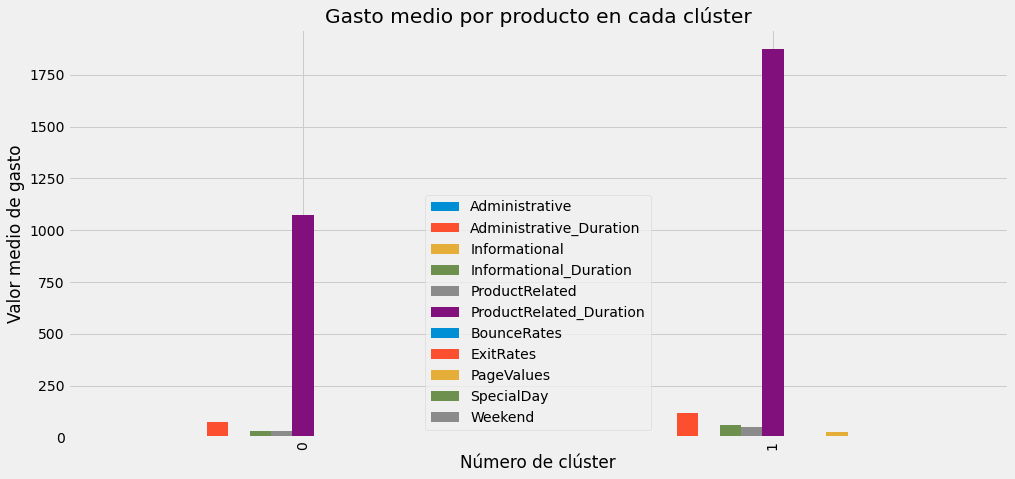

In [91]:
final_plot= XY.drop(columns= ['OperatingSystems', 'Browser', 'Region', 'TrafficType'])
final_plot.groupby('Revenue').mean().plot(kind='bar', figsize=(15,7))
plt.title('Gasto medio por producto en cada clúster')
plt.xlabel(u'Número de clúster')
_ = plt.ylabel('Valor medio de gasto')